In [237]:
# Sentiment Analysis: Airline Tweets Dataset
# In this notebook, we analyze the sentiment/emotions of user responses from tweets.
# The goal is to use sentiment analysis on airline tweets and gather user emotions toward them.

# Importing the libraries
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
from nrclex import NRCLex
import matplotlib.pyplot as plt
import text2emotion as te
import seaborn as sns


#Load the dataset
df = pd.read_csv('~/Downloads/archive-2/Tweets.csv')
print(df.columns)
df.head()

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [238]:
# Cleaning tweets function for a simpler analysis of the data, will be removing @, # and URls.
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # remove @
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'www.\S+', '', text)  # remove URLs
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    text = text.lower()  # lowercase
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [239]:
# Initializing VADER with SentimentIntensityAnalyzer to get scores
sia = SentimentIntensityAnalyzer()

# Apply VADER to get sentiment scores
df['scores'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['scores'].apply(lambda x: x['compound'])

# Classify based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
        
# Defined my sentiment_nlk for data and plots
df['sentiment_nltk'] = df['compound'].apply(classify_sentiment)
df[['clean_text', 'compound', 'sentiment_nltk']].head()

,clean_text,compound,sentiment_nltk
0,what said,0.0000,neutral
1,plus youve added commercials to the experience...,0.0000,neutral
2,i didnt today must mean i need to take another...,0.0000,neutral
3,its really aggressive to blast obnoxious enter...,-0.2716,negative
4,and its a really big bad thing about it,-0.5829,negative


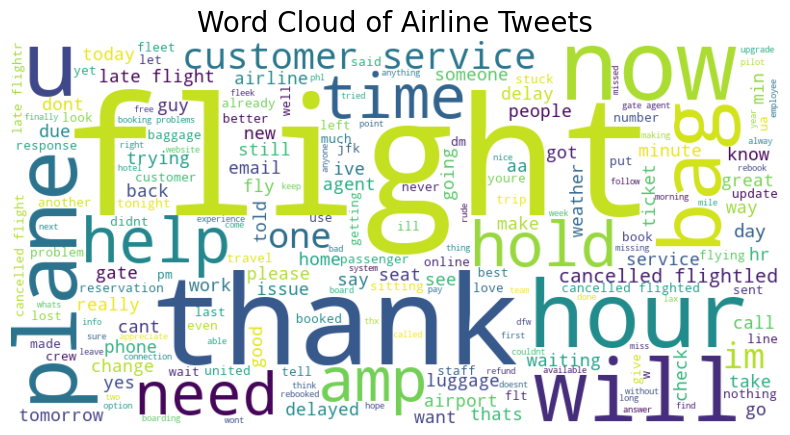

In [240]:
# Join all clean tweets into one big string
text_all = " ".join(tweet for tweet in df['clean_text'])

# Generate the word cloud
# Top words are 'flight', 'thank', 'hour, and 'now'
# Lower words are 'stuck', 'love', 'service', and 'staff'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airline Tweets', fontsize=20)
plt.show()


 Sentiment Count
sentiment_nltk
positive    6077
negative    5086
neutral     3477
Name: count, dtype: int64

 Sentiment Percentages
sentiment_nltk
positive    41.509563
negative    34.740437
neutral     23.750000
Name: proportion, dtype: float64


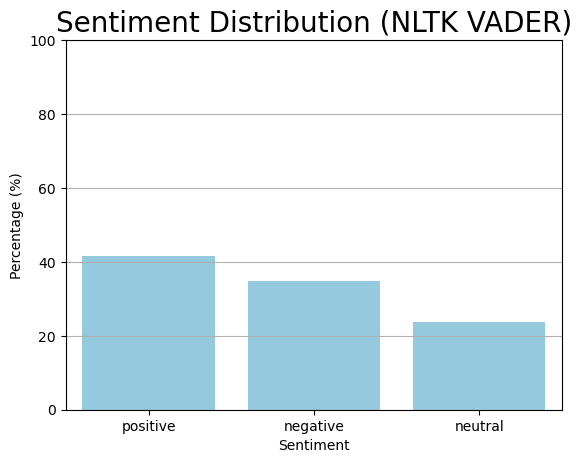

In [241]:
# Sentiment counts with NLTK VADER and converting to perentage
sentiment_counts = df['sentiment_nltk'].value_counts(normalize=True)*100

print(f'\n Sentiment Count')
print(df['sentiment_nltk'].value_counts())
print(f'\n Sentiment Percentages')
print(sentiment_counts)

# Plotting the sentiment distribution bar chart
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='skyblue')
plt.title('Sentiment Distribution (NLTK VADER)', fontsize=20)
plt.ylabel('Percentage (%)')
plt.xlabel('Sentiment')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()



 Emotion Totals
surprise        2231.0
anger           2772.0
fear            3458.0
negative        7189.0
disgust         2203.0
sadness         4236.0
anticipation    5510.0
joy             3291.0
positive        8927.0
trust           5940.0
dtype: float64

 Emotion Percntages
surprise         4.875757
anger            6.058089
fear             7.557314
negative        15.711257
disgust          4.814564
sadness          9.257600
anticipation    12.041873
joy              7.192342
positive        19.509583
trust           12.981620
dtype: float64


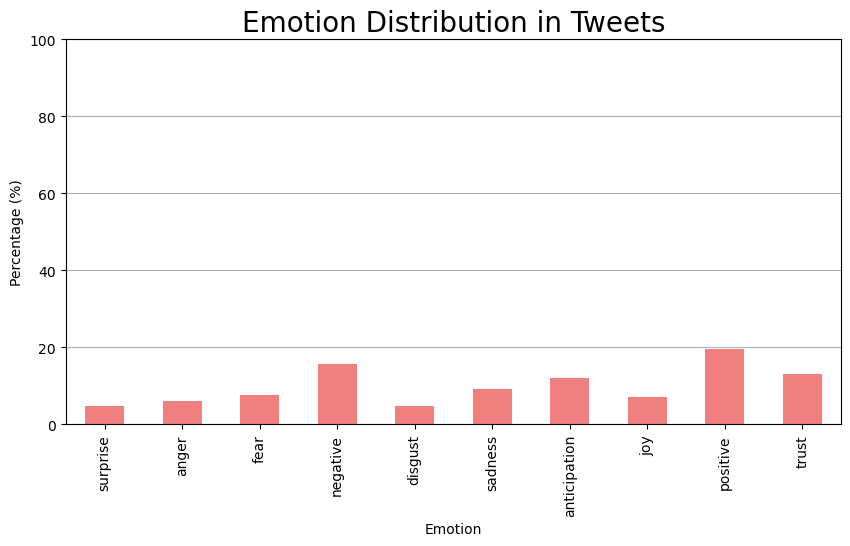

In [242]:
# Creating a function to get emotion scores set with 10 emotions
# Used nrc emotions from the library to simplify this task with these set of emotions:
# Surprise, anger, fear, negative, disgust, sadness, anticipation, joy, positive and trust
def get_nrc_emotions(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores

# Apply to the cleaned tweets
emotion_scores = df['clean_text'].apply(get_nrc_emotions)

# Turn into a DataFrame
emotion_list = []
for item in emotion_scores:
    emotion_list.append(item)

emotion_df = pd.DataFrame(emotion_list).fillna(0)

# Sum across all tweets and normalize final results
emotion_totals = emotion_df.sum()
emotion_percentages = (emotion_totals / emotion_totals.sum()) * 100

print(f'\n Emotion Totals')
print(emotion_totals)
print(f'\n Emotion Percntages')
print(emotion_percentages)

# Plotting the emotional bar chart
emotion_percentages.plot(kind='bar', figsize=(10,5), color='lightcoral')
plt.title('Emotion Distribution in Tweets', fontsize=20)
plt.ylabel('Percentage (%)')
plt.xlabel('Emotion')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


# In this analysis, I performed sentiment and emotion analysis on airline tweets.
# Sentiment analysis was conducted using the NLTK VADER model, categorizing the tweets into 
# positive, neutral, and negative sentiments. A word cloud was generated to visualize the 
# most frequent words appearing in the tweets, highlighting important topics such as flights, 
# delays, and service.
#
# For emotion analysis, I utilized the NRCLex library, which assigns a set of emotional labels 
# such as joy, sadness, anger, and fear to the text. The analysis revealed the distribution
# of emotions across the dataset like anticipation and trust.
# This shows how customers express frustration or favorability with the airline.
#
# Overall, the project demonstrates the ability to apply sentiment models, pull
# emotional context, and visualize results on a real world dataset.
